# K-Means and Hierarchical Clustering

This notebook demonstrates how to perform K-Means and Hierarchical clustering using Python and popular machine learning libraries. We will cover the following steps:
1. Importing necessary libraries
2. Loading and preprocessing the data
3. Performing Hierarchical clustering
4. Performing K-Means clustering
5. Using the Elbow method to determine the optimal number of clusters

## 1. Importing Necessary Libraries

We start by importing the required libraries for linear algebra, data processing, and clustering.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


## 2. Loading and Preprocessing the Data

We load the dataset and perform necessary preprocessing steps such as handling missing values.# 1. Loading the dataset. 

In [2]:
data = pd.read_csv("../input/cc-general/CC GENERAL.csv",index_col = 'CUST_ID')

In [3]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.shape

(8950, 17)

In [5]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

MINIMUM_PAYMENTS contains some missing value.

We will fill them with the mean.

In [7]:
data.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.mean(), inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [9]:
np.any(np.isnan(data.CREDIT_LIMIT))

True

In [10]:
data.CREDIT_LIMIT.fillna(data.CREDIT_LIMIT.mean(), inplace =True)

In [11]:
np.any(np.isnan(data.CREDIT_LIMIT))

False

## 3. Performing Hierarchical Clustering

We use the Agglomerative clustering method to identify inherent groupings within the data.# Hierarchical clustering (Agglomerative)  to identify the inherent groupings within the data

In [12]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data.values)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

In [13]:
agglomerative=pd.DataFrame(clust_labels)
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

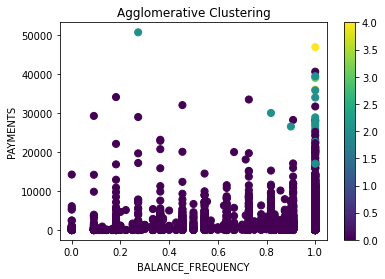

In [14]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE_FREQUENCY'] , data ["PAYMENTS"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("BALANCE_FREQUENCY")
ax.set_ylabel("PAYMENTS")
plt.colorbar(scatter)

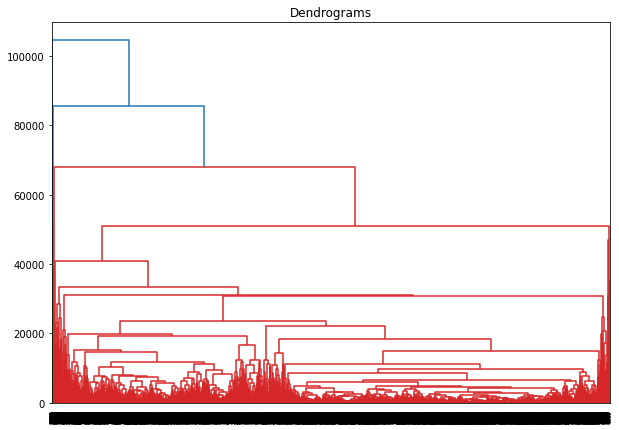

In [15]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

## 4. Performing K-Means Clustering

We use the K-Means clustering algorithm to cluster the data into a specified number of clusters.# K-MEANS

In [16]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

In [17]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,2
1,3
2,0
3,0
4,2
...,...
8945,2
8946,2
8947,2
8948,2


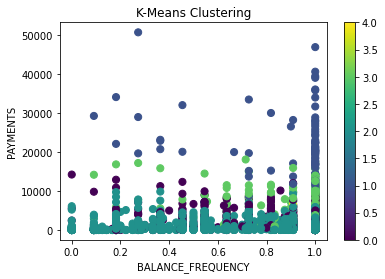

In [18]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE_FREQUENCY'] , data ["PAYMENTS"] , c= labels[0], s=50)
ax.set_title("K-Means Clustering")
ax.set_xlabel("BALANCE_FREQUENCY")
ax.set_ylabel("PAYMENTS")
plt.colorbar(scatter)

We notice adiffence between the clusters formation, btween kmeans and Hierarchical clustering (Agglomerative)

## 5. Using the Elbow Method to Determine the Optimal Number of Clusters

We use the Elbow method to determine the optimal number of clusters for K-Means clustering.# The Elbow Method for the rigth number of k

In [19]:
SSD = []
K = range(1, 15)
for k in K:
    print(k)
    km =  KMeans(n_clusters=k, random_state=0)
    km.fit(data)
    SSD.append(km.inertia_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


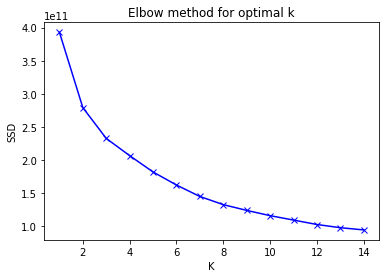

In [20]:
plt.figure()
plt.plot (K , SSD, 'bx-')
plt.title("Elbow method for optimal k")
plt.xlabel("K")
plt.ylabel("SSD")
plt.show()

according to the graphe, k=6, is the optimal number of clusters